In [9]:
'''Question 1(a)''' #(3 points) Decision tree regression: Estimate the number of shares of an article on the test
#data using a decision tree regression.

#"OnlineNewsPopularity.txt"
#"OnlineNewsPopularityTrain.csv"
#"OnlineNewsPopularityTest.csv"

#Implement a 5-fold cross-validation on the train set to
#determine the optimal depth of the decision tree.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

pop_news_train = pd.read_csv("OnlineNewsPopularityTrain.csv", header=None, names = ['url', 'timedelta', 
                                                                                    'n_tokens_title',
                                                                                    'n_tokens_content',
                                                                                    'n_unique_tokens',
                                                                                    'n_non_stop_words',
                                                                                    'n_non_stop_unique_tokens',
                                                                                    'num_hrefs',
                                                                                    'num_self_hrefs',
                                                                                    'num_imgs',
                                                                                    'num_videos',
                                                                                    'average_token_length',
                                                                                    'num_keywords',
                                                                                    'data_channel_is_lifestyle',
                                                                                    'data_channel_is_entertainment',
                                                                                    'data_channel_is_bus',
                                                                                    'data_channel_is_socmed',
                                                                                    'data_channel_is_tech',
                                                                                    'data_channel_is_world',
                                                                                    'kw_min_min',
                                                                                    'kw_max_min',
                                                                                    'kw_avg_min',
                                                                                    'kw_min_max',
                                                                                    'kw_max_max',
                                                                                    'kw_avg_max',
                                                                                    'kw_min_avg',
                                                                                    'kw_max_avg',
                                                                                    'kw_avg_avg',
                                                                                    'self_reference_min_shares',
                                                                                    'self_reference_max_shares',
                                                                                    'self_reference_avg_shares',
                                                                                    'weekday_is_monday',
                                                                                    'weekday_is_tuesday',
                                                                                    'weekday_is_wednesday',
                                                                                    'weekday_is_thursday',
                                                                                    'weekday_is_friday',
                                                                                    'weekday_is_saturday',
                                                                                    'weekday_is_sunday',
                                                                                    'is_weekend',
                                                                                    'LDA_00',
                                                                                    'LDA_01',
                                                                                    'LDA_02',
                                                                                    'LDA_03',
                                                                                    'LDA_04',
                                                                                    'global_subjectivity',
                                                                                    'global_sentiment_polarity',
                                                                                    'global_rate_positive_words',
                                                                                    'global_rate_negative_words',
                                                                                    'rate_positive_words',
                                                                                    'rate_negative_words',
                                                                                    'avg_positive_polarity',
                                                                                    'min_positive_polarity',
                                                                                    'max_positive_polarity',
                                                                                    'avg_negative_polarity',
                                                                                    'min_negative_polarity',
                                                                                    'max_negative_polarity',
                                                                                    'title_subjectivity',
                                                                                    'title_sentiment_polarity',
                                                                                    'abs_title_subjectivity',
                                                                                    'abs_title_sentiment_polarity',
                                                                                    'shares'])
                                                                                  
pop_news_train = pop_news_train.drop(index=0) #gets rid of row zero to make proper headers
#print(pop_news_train.shape)

#5-fold cross validation

#Shuffle the dataset randomly.
pop_news_train = pop_news_train.sample(frac=1)

# Drop the first column of "url"
X_train = pop_news_train.iloc[:, 1:59]
Y_train = pop_news_train['shares'] 

#print(X_train.shape)
#print(Y_train.shape)
#Split the dataset into k groups, k = 5

X_train_1 = X_train.iloc[1:7684]
Y_train_1 = Y_train.iloc[1:7684]


X_train_2 = X_train.iloc[7685:15368]
Y_train_2 = Y_train.iloc[7685:15368]


X_train_3 = X_train.iloc[15369:23052]
Y_train_3 = Y_train.iloc[15369:23052]


X_train_4 = X_train.iloc[23053:30736]
Y_train_4 = Y_train.iloc[23053:30736]


X_train_5 = X_train.iloc[30737:38420]
Y_train_5 = Y_train.iloc[30737:38420]


cross_valid_error = []
depth_of_decision_tree = []

X_train_list = [X_train_1, X_train_2, X_train_3, X_train_4, X_train_5]
Y_train_list = [Y_train_1, Y_train_2, Y_train_3, Y_train_4, Y_train_5]

preds_Y = []

for i in range(5):#Take the group as a hold out or test data set

    Y_train = np.concatenate(Y_train_list[:i]+Y_train_list[i+1:],axis=0).astype(float)
    Y_val = np.asarray(Y_train_list[i]).astype(float)
    X_train = np.concatenate(X_train_list[:i]+X_train_list[i+1:],axis=0).astype(float)
    X_val = np.asarray(X_train_list[i]).astype(float)
    
    #Fit a model on the training set and evaluate it on the test set  
  
    # create a regressor object 
    regressor = DecisionTreeRegressor(random_state = 0)  
    # fit the regressor with X and Y data 
    regressor.fit(X_train, Y_train)
    Y_pred = regressor.predict(X_val) 
    preds_Y.append(Y_pred)
    max_depth = regressor.get_depth()
    
    #testing different depths for different decision tree regressors
    preds_Y_2 = []
    regressor2 = DecisionTreeRegressor(max_features='sqrt', splitter='random', min_samples_split=4, max_depth=3)
    regressor2.fit(X_train, Y_train)
    Y_pred_2 = regressor2.predict(X_val) 
    preds_Y_2.append(Y_pred_2)
    score_2 = regressor2.score(X_val, Y_val)
    mse_2 = mean_squared_error(Y_val,Y_pred_2)
    max_depth_2 = regressor2.get_depth()
    
    preds_Y_3 = []
    regressor3 = DecisionTreeRegressor(max_features='sqrt', splitter='random', min_samples_split=4, max_depth=10)
    regressor3.fit(X_train, Y_train)
    Y_pred_3 = regressor3.predict(X_val) 
    preds_Y_3.append(Y_pred_3)
    score_3 = regressor3.score(X_val, Y_val)
    mse_3 = mean_squared_error(Y_val,Y_pred_3)
    max_depth_3 = regressor3.get_depth()
    
    preds_Y_4 = []
    regressor4 = DecisionTreeRegressor(max_features='sqrt', splitter='random', min_samples_split=4, max_depth=20)
    regressor4.fit(X_train, Y_train)
    Y_pred_4 = regressor4.predict(X_val) 
    preds_Y_4.append(Y_pred_4)
    score_4 = regressor4.score(X_val, Y_val)
    mse_4 = mean_squared_error(Y_val,Y_pred_4)
    max_depth_4 = regressor4.get_depth()
    
    
#Report the average error (e.g., square root
#residual sum of squares) over all folds on the train data for each depth of the tree, as well as
#the average error of the test data for the optimal tree depth.

#  give me the square root of the residual sum of square of error w.r.t max_depth of decision tree

er = []
er2 = []
er3 = []
er4 = []

g = 0
g2 = 0
g3 = 0
g4 = 0

for m in range(len(Y_val)):
    #print( "actual=", Y_val[m], " observed=", Y_pred[m])
    x = (Y_val[m] - Y_pred[m]) **2
    x2 = (Y_val[m] - Y_pred_2[m]) **2
    x3 = (Y_val[m] - Y_pred_3[m]) **2
    x4 = (Y_val[m] - Y_pred_4[m]) **2
    
    er.append(x)
    er2.append(x2)
    er3.append(x3)
    er4.append(x4)
    
    g = g + x
    g2 = g2 + x2
    g3 = g3 + x3
    g4 = g4 + x4
    
x = 0
x2 = 0
x3 = 0
x4 = 0

for i in range(len(er)):
    x = x + er[i]
for i2 in range(len(er2)):
    x2 = x2 + er2[i2]
for i3 in range(len(er3)):
    x3 = x3 + er3[i3]
for i4 in range(len(er4)):
    x4 = x4 + er4[i4]

v = np.var(er)
v2 = np.var(er2)
v3 = np.var(er3)
v4 = np.var(er4)

m = np.mean(Y_val)

#print ("average of observed values", m)

y = 0
for i in range(len(Y_val)):
    y = y + ((Y_val[i] - m) ** 2)

rss_1 = round(np.sqrt(g),2)    
rss_2 = round(np.sqrt(g2),2)
rss_3 = round(np.sqrt(g3),2)
rss_4 = round(np.sqrt(g4),2)

print("The RSS value : % 3d, Tree depth : % 2d" %(rss_1, max_depth))
print("The RSS value : % 3d, Tree depth : % 2d" %(rss_2, max_depth_2))
print("The RSS value : % 3d, Tree depth : % 2d" %(rss_3, max_depth_3))
print("The RSS value : % 3d, Tree depth : % 2d" %(rss_4, max_depth_4)) 

C:\Users\Esther Joseph\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The RSS value :  1469486, Tree depth :  59
The RSS value :  1114004, Tree depth :  3
The RSS value :  1144538, Tree depth :  10
The RSS value :  1618142, Tree depth :  20


In [28]:
'''Question 1(b)''' #(4 points) Random forest regression: Implement a regression tree to estimate the number
#of shares of an article on the test data. You can use any library for the decision tree,

#but you will need to implement the random forest (i.e., randomize the input samples and the input
#features of each decision tree, combine the results from all trees to obtain a final decision).

#Implement a 5-fold cross-validation on the train to identify the optimal tree depth and number
#of trees.Report the average error (e.g., square root residual sum of squares) over all folds on


#droput is randomly removing weights and running again


#the train data for each combination of tree depth and number of trees (you can show this as
#a 2-dimensional color-coded matrix, whose x/y dimensions are the number of trees and tree
#depth, and the color-coding reflects the average error over all folds). Report the average error
#of the test data using the random forest with the optimal tree depth and number of trees.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import random
from sklearn.metrics import mean_squared_error, r2_score
#from DecisionTree import DecisionTreeClassifier


pop_news_train = pd.read_csv("OnlineNewsPopularityTrain.csv", header=None, names = ['url', 'timedelta', 
                                                                                    'n_tokens_title',
                                                                                    'n_tokens_content',
                                                                                    'n_unique_tokens',
                                                                                    'n_non_stop_words',
                                                                                    'n_non_stop_unique_tokens',
                                                                                    'num_hrefs',
                                                                                    'num_self_hrefs',
                                                                                    'num_imgs',
                                                                                    'num_videos',
                                                                                    'average_token_length',
                                                                                    'num_keywords',
                                                                                    'data_channel_is_lifestyle',
                                                                                    'data_channel_is_entertainment',
                                                                                    'data_channel_is_bus',
                                                                                    'data_channel_is_socmed',
                                                                                    'data_channel_is_tech',
                                                                                    'data_channel_is_world',
                                                                                    'kw_min_min',
                                                                                    'kw_max_min',
                                                                                    'kw_avg_min',
                                                                                    'kw_min_max',
                                                                                    'kw_max_max',
                                                                                    'kw_avg_max',
                                                                                    'kw_min_avg',
                                                                                    'kw_max_avg',
                                                                                    'kw_avg_avg',
                                                                                    'self_reference_min_shares',
                                                                                    'self_reference_max_shares',
                                                                                    'self_reference_avg_shares',
                                                                                    'weekday_is_monday',
                                                                                    'weekday_is_tuesday',
                                                                                    'weekday_is_wednesday',
                                                                                    'weekday_is_thursday',
                                                                                    'weekday_is_friday',
                                                                                    'weekday_is_saturday',
                                                                                    'weekday_is_sunday',
                                                                                    'is_weekend',
                                                                                    'LDA_00',
                                                                                    'LDA_01',
                                                                                    'LDA_02',
                                                                                    'LDA_03',
                                                                                    'LDA_04',
                                                                                    'global_subjectivity',
                                                                                    'global_sentiment_polarity',
                                                                                    'global_rate_positive_words',
                                                                                    'global_rate_negative_words',
                                                                                    'rate_positive_words',
                                                                                    'rate_negative_words',
                                                                                    'avg_positive_polarity',
                                                                                    'min_positive_polarity',
                                                                                    'max_positive_polarity',
                                                                                    'avg_negative_polarity',
                                                                                    'min_negative_polarity',
                                                                                    'max_negative_polarity',
                                                                                    'title_subjectivity',
                                                                                    'title_sentiment_polarity',
                                                                                    'abs_title_subjectivity',
                                                                                    'abs_title_sentiment_polarity',
                                                                                    'shares'])
                                                                                  
pop_news_train = pop_news_train.drop(index=0) #gets rid of row zero to make proper headers
#print(pop_news_train.shape)

total_input_features = len(pop_news_train.columns)
#print(total_input_feature)


#5-fold cross validation

#Shuffle the dataset randomly.
pop_news_train = pop_news_train.sample(frac=1)

# Drop the first column of "url"
X_train = pop_news_train.iloc[:, 1:59]
Y_train = pop_news_train['shares'] 

#print(X_train.shape)
#print(Y_train.shape)
#Split the dataset into k groups, k = 5

X_train_1 = X_train.iloc[1:7684]
Y_train_1 = Y_train.iloc[1:7684]

X_train_2 = X_train.iloc[7685:15368]
Y_train_2 = Y_train.iloc[7685:15368]

X_train_3 = X_train.iloc[15369:23052]
Y_train_3 = Y_train.iloc[15369:23052]

X_train_4 = X_train.iloc[23053:30736]
Y_train_4 = Y_train.iloc[23053:30736]

X_train_5 = X_train.iloc[30737:38420]
Y_train_5 = Y_train.iloc[30737:38420]

cross_valid_error = []
depth_of_decision_tree = []
number_of_trees = 10
depths_gathered = []

tree_list = []

forest_generated = []

X_train_list = [X_train_1, X_train_2, X_train_3, X_train_4, X_train_5]
Y_train_list = [Y_train_1, Y_train_2, Y_train_3, Y_train_4, Y_train_5]

for t in range(number_of_trees): #generating multiple trees for random forest
    
    for i in range(5):#Take the group as a hold out or test data set
        
        Y_train = np.concatenate(Y_train_list[:i]+Y_train_list[i+1:],axis=0).astype(float)
        Y_val = np.asarray(Y_train_list[i]).astype(float)
        X_train = np.concatenate(X_train_list[:i]+X_train_list[i+1:],axis=0).astype(float)
        X_val = np.asarray(X_train_list[i]).astype(float)
    
        # create a regressor object 
        regressor = DecisionTreeRegressor(random_state=0)  

        # fit the regressor with X and Y data 
        regressor.fit(X_train, Y_train)
        Y_pred = regressor.predict(X_val) 
        preds_Y.append(Y_pred)
        max_depth = regressor.get_depth()
        #print(max_depth)
        depth_of_decision_tree.append(max_depth)
    
        cross_valid_error.append(1 + score)
        #depth_of_decision_tree.append(regressor.get_depth())

        #testing different depths for different decision tree regressors
        preds_Y_2 = []
        regressor2 = DecisionTreeRegressor(max_features='sqrt', splitter='random', min_samples_split=4, max_depth=5)
        regressor2.fit(X_train, Y_train)
        Y_pred_2 = regressor2.predict(X_val) 
        preds_Y_2.append(Y_pred_2)
        max_depth_2 = regressor2.get_depth()
        depth_of_decision_tree.append(max_depth_2)

        preds_Y_3 = []
        regressor3 = DecisionTreeRegressor(max_features='sqrt', splitter='random', min_samples_split=4, max_depth=25)
        regressor3.fit(X_train, Y_train)
        Y_pred_3 = regressor3.predict(X_val) 
        preds_Y_3.append(Y_pred_3)
        max_depth_3 = regressor3.get_depth()
        depth_of_decision_tree.append(max_depth_3)
        
                                   
        preds_Y_4 = []
        regressor4 = DecisionTreeRegressor(max_features='sqrt', splitter='random', min_samples_split=4, max_depth=75)
        regressor4.fit(X_train, Y_train)
        Y_pred_4 = regressor4.predict(X_val) 
        preds_Y_4.append(Y_pred_4)
        max_depth_4 = regressor4.get_depth() 
        depth_of_decision_tree.append(max_depth_4)
                                                           
        
        er = []
        er2 = []
        er3 = []
        er4 = []

        g = 0
        g2 = 0
        g3 = 0
        g4 = 0

        for m in range(len(Y_val)):                        
            x = (Y_val[m] - Y_pred[m]) **2                       
            x2 = (Y_val[m] - Y_pred_2[m]) **2                           
            x3 = (Y_val[m] - Y_pred_3[m]) **2                           
            x4 = (Y_val[m] - Y_pred_4[m]) **2

            er.append(x)
            er2.append(x2)
            er3.append(x3)
            er4.append(x4)

            g = g + x
            g2 = g2 + x2
            g3 = g3 + x3
            g4 = g4 + x4

        x = 0
        x2 = 0
        x3 = 0
        x4 = 0

        for i in range(len(er)):
            x = x + er[i]
        for i2 in range(len(er2)):
            x2 = x2 + er2[i2]
        for i3 in range(len(er3)):
            x3 = x3 + er3[i3]
        for i4 in range(len(er4)):
            x4 = x4 + er4[i4]

        v = np.var(er)
        v2 = np.var(er2)
        v3 = np.var(er3)
        v4 = np.var(er4)

        m = np.mean(Y_val)

        #print ("average of observed values", m)

        y = 0
        for i in range(len(Y_val)):
            y = y + ((Y_val[i] - m) ** 2)

        rss_1 = round(np.sqrt(g),2)    
        rss_2 = round(np.sqrt(g2),2)
        rss_3 = round(np.sqrt(g3),2)
        rss_4 = round(np.sqrt(g4),2)

        # initialize list of lists 
        data = [(rss_1, max_depth), (rss_2, max_depth_2), (rss_3, max_depth_3), (rss_4, max_depth_4)] 

        forest_generated.append(data)
        depths_gathered.append(depth_of_decision_tree)
    

#print(forest_generated) #make this into a dataframe and organize as such
#print(depths_gathered)

forest_df = pd.DataFrame(forest_generated, columns = ['max_depth = 57.4','max depth = 5', 'max_depth = 25', \
                                                      'max_depth = 75'])

print("Random Forest Generated - Each Data Point Represents a Tree = (Average Error/Tree Depth)")

print(forest_df)
    

C:\Users\Esther Joseph\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Random Forest Generated - Each Data Point Represents a Tree = (Average Error/Tree Depth)
    max_depth = 57.4    max depth = 5    max_depth = 25    max_depth = 75
0   (1889930.06, 58)   (959945.44, 5)  (1688256.48, 25)  (1346206.58, 47)
1   (1719058.92, 62)  (1453629.86, 5)  (1697736.58, 25)  (1556889.16, 53)
2   (1709474.26, 62)   (710236.36, 5)   (905635.21, 25)  (1140630.79, 48)
3   (1123709.03, 55)   (713020.59, 5)  (1311408.94, 25)   (907533.68, 46)
4   (1682206.29, 58)  (1115898.04, 5)  (1217252.05, 25)  (1381261.37, 49)
5   (1889930.06, 58)   (960438.63, 5)   (1421938.3, 25)  (1422274.77, 52)
6   (1719058.92, 62)  (1455984.08, 5)   (1590296.1, 25)   (1650644.5, 46)
7   (1709474.26, 62)   (706904.37, 5)   (983467.94, 25)  (1042437.47, 46)
8   (1123709.03, 55)   (683277.05, 5)  (1187673.75, 25)   (912751.38, 49)
9   (1682206.29, 58)  (1119358.84, 5)  (1435749.38, 25)  (1426442.74, 47)
10  (1889930.06, 58)   (964699.89, 5)  (1497217.09, 25)  (1393606.97, 50)
11  (1719058.92, 62)  (

C:\Users\Esther Joseph\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The most popular features are kw_avg_avg, kw_max_avg, n_unique_tokens, and self_reference_avg_shares


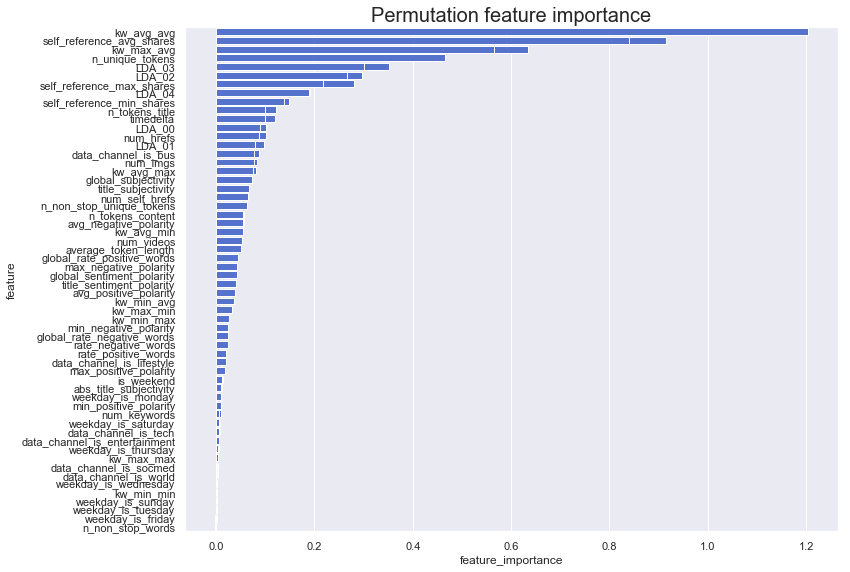

In [7]:
'''Question 1(c)''' #(1 point) Feature exploration: Inspect the final decision tree from question (a) and identify
#the most important features for predicting the popularity score. Please report these features
#and provide your intuitions.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import numpy as np
from sklearn import tree

from sklearn.metrics import r2_score
from rfpimp import permutation_importances

pop_news_train = pd.read_csv("OnlineNewsPopularityTrain.csv", header=None, names = ['url', 'timedelta', 
                                                                                    'n_tokens_title',
                                                                                    'n_tokens_content',
                                                                                    'n_unique_tokens',
                                                                                    'n_non_stop_words',
                                                                                    'n_non_stop_unique_tokens',
                                                                                    'num_hrefs',
                                                                                    'num_self_hrefs',
                                                                                    'num_imgs',
                                                                                    'num_videos',
                                                                                    'average_token_length',
                                                                                    'num_keywords',
                                                                                    'data_channel_is_lifestyle',
                                                                                    'data_channel_is_entertainment',
                                                                                    'data_channel_is_bus',
                                                                                    'data_channel_is_socmed',
                                                                                    'data_channel_is_tech',
                                                                                    'data_channel_is_world',
                                                                                    'kw_min_min',
                                                                                    'kw_max_min',
                                                                                    'kw_avg_min',
                                                                                    'kw_min_max',
                                                                                    'kw_max_max',
                                                                                    'kw_avg_max',
                                                                                    'kw_min_avg',
                                                                                    'kw_max_avg',
                                                                                    'kw_avg_avg',
                                                                                    'self_reference_min_shares',
                                                                                    'self_reference_max_shares',
                                                                                    'self_reference_avg_shares',
                                                                                    'weekday_is_monday',
                                                                                    'weekday_is_tuesday',
                                                                                    'weekday_is_wednesday',
                                                                                    'weekday_is_thursday',
                                                                                    'weekday_is_friday',
                                                                                    'weekday_is_saturday',
                                                                                    'weekday_is_sunday',
                                                                                    'is_weekend',
                                                                                    'LDA_00',
                                                                                    'LDA_01',
                                                                                    'LDA_02',
                                                                                    'LDA_03',
                                                                                    'LDA_04',
                                                                                    'global_subjectivity',
                                                                                    'global_sentiment_polarity',
                                                                                    'global_rate_positive_words',
                                                                                    'global_rate_negative_words',
                                                                                    'rate_positive_words',
                                                                                    'rate_negative_words',
                                                                                    'avg_positive_polarity',
                                                                                    'min_positive_polarity',
                                                                                    'max_positive_polarity',
                                                                                    'avg_negative_polarity',
                                                                                    'min_negative_polarity',
                                                                                    'max_negative_polarity',
                                                                                    'title_subjectivity',
                                                                                    'title_sentiment_polarity',
                                                                                    'abs_title_subjectivity',
                                                                                    'abs_title_sentiment_polarity',
                                                                                    'shares'])
                                                                                  
pop_news_train = pop_news_train.drop(index=0) #gets rid of row zero to make proper headers
#print(pop_news_train.shape)


def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

#5-fold cross validation

#Shuffle the dataset randomly.
pop_news_train = pop_news_train.sample(frac=1)

# Drop the first column of "url"
X_train = pop_news_train.iloc[:, 1:59]
Y_train = pop_news_train['shares'] 

#Split the dataset into k groups, k = 5

X_train_1 = X_train.iloc[1:7684]
Y_train_1 = Y_train.iloc[1:7684]

X_train_2 = X_train.iloc[7685:15368]
Y_train_2 = Y_train.iloc[7685:15368]

X_train_3 = X_train.iloc[15369:23052]
Y_train_3 = Y_train.iloc[15369:23052]

X_train_4 = X_train.iloc[23053:30736]
Y_train_4 = Y_train.iloc[23053:30736]

X_train_5 = X_train.iloc[30737:38420]
Y_train_5 = Y_train.iloc[30737:38420]

X_train_list = [X_train_1, X_train_2, X_train_3, X_train_4, X_train_5]
Y_train_list = [Y_train_1, Y_train_2, Y_train_3, Y_train_4, Y_train_5]

# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    
    sns.set(rc={'figure.figsize':(11.7,9.27)})
    
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)


for i in range(5):#Take the group as a hold out or test data set

    Y_val = Y_train_list[i]
    Y_train_s = Y_train.drop(Y_val.index)
    X_val = X_train_list[i]
    X_train_s = X_train.drop(X_val.index)
    
    

    rf = RandomForestRegressor(n_estimators = 100,n_jobs = -1,oob_score = True,bootstrap = True,random_state = 42)
    rf.fit(X_train, Y_train)
    
    def r2(rf, X_train, Y_train):
        return r2_score(Y_train, rf.predict(X_train))
    
    perm_imp_rfpimp = permutation_importances(rf,X_train_s, Y_train_s, r2)
    perm_imp_rfpimp.reset_index(drop = False, inplace = True)

    var_imp_plot(perm_imp_rfpimp, 'Permutation feature importance')
    
    
    #base_imp = imp_df(X_train.columns, rf.feature_importances_)
    #var_imp_plot(base_imp, 'Default feature importance (scikit-learn)')
    
    #clf = DecisionTreeRegressor(random_state = 0)
    #clf = clf.fit(X_train, Y_train)
    #tree.export_graphviz(clf)
print('The most popular features are kw_avg_avg, kw_max_avg, n_unique_tokens, and self_reference_avg_shares')

In [1]:
'''Question 1(d)''' #(2 points) Feedforward neural network: Estimate the number of shares of an article on the
#test data using a feedforward neural network. Using a 5-fold cross-validation experiment with
#different number of layers, node per layer, activation functions, dropout, and learning rate.
#Experiment with the original feature set, as well as with the most important features found
#from question (iii).
#Hint: You can use the sklearn.GridSearchCV function or any other similar function for the
#hyper-parameter tuning.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

pop_news_train = pd.read_csv("OnlineNewsPopularityTrain.csv", header=None, names = ['url', 'timedelta', 
                                                                                    'n_tokens_title',
                                                                                    'n_tokens_content',
                                                                                    'n_unique_tokens',
                                                                                    'n_non_stop_words',
                                                                                    'n_non_stop_unique_tokens',
                                                                                    'num_hrefs',
                                                                                    'num_self_hrefs',
                                                                                    'num_imgs',
                                                                                    'num_videos',
                                                                                    'average_token_length',
                                                                                    'num_keywords',
                                                                                    'data_channel_is_lifestyle',
                                                                                    'data_channel_is_entertainment',
                                                                                    'data_channel_is_bus',
                                                                                    'data_channel_is_socmed',
                                                                                    'data_channel_is_tech',
                                                                                    'data_channel_is_world',
                                                                                    'kw_min_min',
                                                                                    'kw_max_min',
                                                                                    'kw_avg_min',
                                                                                    'kw_min_max',
                                                                                    'kw_max_max',
                                                                                    'kw_avg_max',
                                                                                    'kw_min_avg',
                                                                                    'kw_max_avg',
                                                                                    'kw_avg_avg',
                                                                                    'self_reference_min_shares',
                                                                                    'self_reference_max_shares',
                                                                                    'self_reference_avg_shares',
                                                                                    'weekday_is_monday',
                                                                                    'weekday_is_tuesday',
                                                                                    'weekday_is_wednesday',
                                                                                    'weekday_is_thursday',
                                                                                    'weekday_is_friday',
                                                                                    'weekday_is_saturday',
                                                                                    'weekday_is_sunday',
                                                                                    'is_weekend',
                                                                                    'LDA_00',
                                                                                    'LDA_01',
                                                                                    'LDA_02',
                                                                                    'LDA_03',
                                                                                    'LDA_04',
                                                                                    'global_subjectivity',
                                                                                    'global_sentiment_polarity',
                                                                                    'global_rate_positive_words',
                                                                                    'global_rate_negative_words',
                                                                                    'rate_positive_words',
                                                                                    'rate_negative_words',
                                                                                    'avg_positive_polarity',
                                                                                    'min_positive_polarity',
                                                                                    'max_positive_polarity',
                                                                                    'avg_negative_polarity',
                                                                                    'min_negative_polarity',
                                                                                    'max_negative_polarity',
                                                                                    'title_subjectivity',
                                                                                    'title_sentiment_polarity',
                                                                                    'abs_title_subjectivity',
                                                                                    'abs_title_sentiment_polarity',
                                                                                    'shares'])
                                                                                  
pop_news_train = pop_news_train.drop(index=0) #gets rid of row zero to make proper headers
#print(pop_news_train.shape)

#5-fold cross validation

#Shuffle the dataset randomly.
pop_news_train = pop_news_train.sample(frac=1)

# Drop the first column of "url"
X_train = pop_news_train.iloc[:, 1:59]
Y_train = pop_news_train['shares'] 

#print(X_train.shape)
#print(Y_train.shape)
#Split the dataset into k groups, k = 5

X_train_1 = X_train.iloc[1:7684]
Y_train_1 = Y_train.iloc[1:7684]


X_train_2 = X_train.iloc[7685:15368]
Y_train_2 = Y_train.iloc[7685:15368]


X_train_3 = X_train.iloc[15369:23052]
Y_train_3 = Y_train.iloc[15369:23052]


X_train_4 = X_train.iloc[23053:30736]
Y_train_4 = Y_train.iloc[23053:30736]


X_train_5 = X_train.iloc[30737:38420]
Y_train_5 = Y_train.iloc[30737:38420]


cross_valid_error = []
depth_of_decision_tree = []

X_train_list = [X_train_1, X_train_2, X_train_3, X_train_4, X_train_5]
Y_train_list = [Y_train_1, Y_train_2, Y_train_3, Y_train_4, Y_train_5]

preds_Y = []

for i in range(5):#Take the group as a hold out or test data set
      
    Y_train = np.concatenate(Y_train_list[:i]+Y_train_list[i+1:],axis=0).astype(float)
    Y_val = np.asarray(Y_train_list[i]).astype(float)
    X_train = np.concatenate(X_train_list[:i]+X_train_list[i+1:],axis=0).astype(float)
    X_val = np.asarray(X_train_list[i]).astype(float)
      
   #parameters = {'kernel':('identity','logistic', 'relu'), 'C':[1, 10]}
   #svc = svm.SVC(gamma = "scale")
   #clf = GridSearchCV(svc, parameters, cv=5)
   #clf.fit(X_train, Y_train)
    
    #create a for loop to run through items in each list, each mlp print what was used like print i(i) in separate line
    
    activation_list = ['identity', 'logistic']
    learning_rate_list = [0.001, 0.01, 0.05, 0.1, 0.5]
    hidden_layer_sizes = [(5,5,5), (10,10,10), (15,15,15), (20,20,20)]
    print("Hidden Layer Size: ", hidden_layer_sizes[i])
    #print out # of nodes by making another list like
    #number_of_nodes = [x* |for x in hidden_layer_sizes] #only for display, use list comprehension for this
    number_of_nodes = []
    #for i in range(len(hidden_layer_sizes)):
        #print(hidden_layer_sizes[i])
    #    x = [sum(i) for i in hidden_layer_sizes]
    #    number_of_nodes.append(x)
    
    #print(number_of_nodes)    
        
        
    #retrieve formula for this
    
    for h_lay_size in hidden_layer_sizes:
        
        
        mlp1 = MLPRegressor(hidden_layer_sizes=h_lay_size, activation = 'identity', solver = 'adam', \
                            learning_rate = 'constant')
        mlp1.fit(X_train,Y_train)
        #return error of residual sums like part a and b 
        Y_pred = mlp1.predict(X_train)
        preds_Y.append(Y_pred)

        mlp2 = MLPRegressor(hidden_layer_sizes=h_lay_size, activation = 'identity',solver = 'adam', \
                            learning_rate = 'adaptive')
        mlp2.fit(X_train,Y_train)
        #return error of residual sums like part a and b 
        Y_pred_2 = mlp2.predict(X_train)
        preds_Y.append(Y_pred_2)

        mlp3 = MLPRegressor(hidden_layer_sizes=h_lay_size, activation = 'logistic', solver = 'adam', \
                            learning_rate = 'constant')
        mlp3.fit(X_train,Y_train)
        #return error of residual sums like part a and b 
        Y_pred_3 = mlp3.predict(X_train)
        preds_Y.append(Y_pred_3)

        mlp4 = MLPRegressor(hidden_layer_sizes=h_lay_size, activation = 'logistic', solver = 'adam', \
                            learning_rate = 'adaptive')
        mlp4.fit(X_train,Y_train)
        #return error of residual sums like part a and b 
        Y_pred_4 = mlp4.predict(X_train)
        preds_Y.append(Y_pred_4)

    er = []
    er2 = []
    er3 = []
    er4 = []

    g = 0
    g2 = 0
    g3 = 0
    g4 = 0
    
    
    for m in range(len(Y_val)):
        #print( "actual=", Y_val[m], " observed=", Y_pred[m])
        x = (Y_val[m] - Y_pred[m]) **2
        x2 = (Y_val[m] - Y_pred_2[m]) **2
        x3 = (Y_val[m] - Y_pred_3[m]) **2
        x4 = (Y_val[m] - Y_pred_4[m]) **2

        er.append(x)
        er2.append(x2)
        er3.append(x3)
        er4.append(x4)
        
        
        
        g = g + x
        g2 = g2 + x2
        g3 = g3 + x3
        g4 = g4 + x4

    x = 0
    x2 = 0
    x3 = 0
    x4 = 0

    for i in range(len(er)):
        x = x + er[i]
    for i2 in range(len(er2)):
        x2 = x2 + er2[i2]
    for i3 in range(len(er3)):
        x3 = x3 + er3[i3]
    for i4 in range(len(er4)):
        x4 = x4 + er4[i4]

    v = np.var(er)
    v2 = np.var(er2)
    v3 = np.var(er3)
    v4 = np.var(er4)

    m = np.mean(Y_val)

    #print ("average of observed values", m)

    y = 0
    for i in range(len(Y_val)):
        y = y + ((Y_val[i] - m) ** 2)

    print ("Activation Function: Identity, Learning Rate: constant, average error from rss = ", round(np.sqrt(g),2))
    print ("Activation Function: Identity, Learning Rate: adaptive, average error from rss2 = ", round(np.sqrt(g2),2))
    print ("Activation Function: Logistic, Learning Rate: constant, average error from rss3 = ", round(np.sqrt(g3),2))
    print ("Activation Function: Logistic, Learning Rate: adaptive, average error from rss4 = ", round(np.sqrt(g4),2))

C:\Users\Esther Joseph\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Hidden Layer Size:  (5, 5, 5)


C:\Users\Esther Joseph\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Esther Joseph\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Esther Joseph\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Esther Joseph\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged 

Activation Function: Identity, Learning Rate: constant, average error from rss =  1351389.67
Activation Function: Identity, Learning Rate: adaptive, average error from rss2 =  1348331.41
Activation Function: Logistic, Learning Rate: constant, average error from rss3 =  1366612.23
Activation Function: Logistic, Learning Rate: adaptive, average error from rss4 =  1366627.88
Hidden Layer Size:  (10, 10, 10)


C:\Users\Esther Joseph\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Esther Joseph\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Esther Joseph\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Esther Joseph\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged 

Activation Function: Identity, Learning Rate: constant, average error from rss =  1178183.81
Activation Function: Identity, Learning Rate: adaptive, average error from rss2 =  1173023.86
Activation Function: Logistic, Learning Rate: constant, average error from rss3 =  1195893.2
Activation Function: Logistic, Learning Rate: adaptive, average error from rss4 =  1195893.24
Hidden Layer Size:  (15, 15, 15)


C:\Users\Esther Joseph\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Esther Joseph\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Esther Joseph\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Esther Joseph\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged 

Activation Function: Identity, Learning Rate: constant, average error from rss =  852015.14
Activation Function: Identity, Learning Rate: adaptive, average error from rss2 =  851361.87
Activation Function: Logistic, Learning Rate: constant, average error from rss3 =  879683.2
Activation Function: Logistic, Learning Rate: adaptive, average error from rss4 =  879792.17


C:\Users\Esther Joseph\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Esther Joseph\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Esther Joseph\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Esther Joseph\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged 

Hidden Layer Size:  (20, 20, 20)
Activation Function: Identity, Learning Rate: constant, average error from rss =  757381.03
Activation Function: Identity, Learning Rate: adaptive, average error from rss2 =  746936.78
Activation Function: Logistic, Learning Rate: constant, average error from rss3 =  736965.9
Activation Function: Logistic, Learning Rate: adaptive, average error from rss4 =  736830.35


IndexError: list index out of range